In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

In [3]:
#df = pd.read_csv(r"C:\Users\Claudio\Desktop\Arbeit\Verkaufsdaten_DE_80.csv", sep=";")
df = pd.read_csv(r"C:\Users\Claudio\Desktop\Arbeit\Claudios_Group_AG.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Kundenname               80 non-null     object 
 1   Region                   80 non-null     object 
 2   Produkt                  80 non-null     object 
 3   Kaufpreis (EUR)          80 non-null     int64  
 4   Absatz                   80 non-null     int64  
 5   Verkaufpreis (EUR)       80 non-null     int64  
 6   Steuern (EUR)            80 non-null     float64
 7   Mitarbeiterkosten (EUR)  80 non-null     int64  
 8   Laden                    80 non-null     object 
 9   Bruttoumsatz             80 non-null     float64
 10  Nettoumsatz              80 non-null     float64
 11  Umsatz                   80 non-null     float64
 12  Bruttomarge_Prozent      80 non-null     float64
 13  Nettomarge_Prozent       80 non-null     float64
 14  Region_Kurz              80 

In [5]:
df.drop('Unnamed: 13', axis=1, inplace=True)
#daten kurz bereinigt Unnamed 12 und 13 gelöscht

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Kundenname               80 non-null     object 
 1   Region                   80 non-null     object 
 2   Produkt                  80 non-null     object 
 3   Kaufpreis (EUR)          80 non-null     int64  
 4   Absatz                   80 non-null     int64  
 5   Verkaufpreis (EUR)       80 non-null     int64  
 6   Steuern (EUR)            80 non-null     float64
 7   Mitarbeiterkosten (EUR)  80 non-null     int64  
 8   Laden                    80 non-null     object 
 9   Bruttoumsatz             80 non-null     float64
 10  Nettoumsatz              80 non-null     float64
 11  Umsatz                   80 non-null     float64
dtypes: float64(4), int64(4), object(4)
memory usage: 7.6+ KB


In [ ]:
df.loc[(df['Region']== "Berlin") & (df['Umsatz'] > 50000)]



,Kundenname,Region,Produkt,Kaufpreis (EUR),Absatz,Verkaufpreis (EUR),Steuern (EUR),Mitarbeiterkosten (EUR),Laden,Bruttoumsatz,Nettoumsatz,Umsatz
2,Wolf AG,Berlin,Drucker,799,32,1738,330.22,785,Store Berlin,30010.44,28895.22,55546.48
7,Schmidt AG,Berlin,Tablet,1897,38,2438,463.22,2954,Store Frankfurt,20525.54,17108.32,92497.72
23,Schmidt AG,Berlin,Lampe,976,39,1586,301.34,4526,Store Köln,23814.40,18987.06,61917.44
60,Schulz GmbH,Berlin,Fernseher,1914,38,2338,444.22,1237,Store Leipzig,16230.72,14549.50,89498.64
76,Schmidt AG,Berlin,Kaffeeautomat,1886,38,2178,413.82,1792,Store Dresden,11014.24,8808.42,82154.16


In [ ]:
print(df['Umsatz'].sum())
#damit wir den gesamten Umsatz sehen können.

3652936.02


In [ ]:
print(round(df['Umsatz'].mean(), 2)) #die gerundete Zahl kommt hinten hin und nicht vorne, merke dir das. 
#hier noch der durchschnittliche Umsatz 

45661.7


In [46]:
df.loc[(df['Kundenname']== "Wolf AG") & (df['Umsatz'] > 1000)]

,Kundenname,Region,Produkt,Kaufpreis (EUR),Absatz,Verkaufpreis (EUR),Steuern (EUR),Mitarbeiterkosten (EUR),Laden,Bruttoumsatz,Nettoumsatz,Umsatz
2,Wolf AG,Berlin,Drucker,799,32,1738,330.22,785,Store Berlin,30010.44,28895.22,55546.48
5,Wolf AG,Hamburg,Laptop,861,34,1700,323.00,2716,Store Hannover,28895.16,25856.16,58548.00
8,Wolf AG,Baden-Württemberg,E-Bike,404,16,597,113.43,4589,Store Berlin,3118.88,-1583.55,9647.52
14,Wolf AG,Bayern,Mikrowelle,545,22,770,146.30,711,Store Frankfurt,4905.00,4047.70,16786.00
24,Wolf AG,Sachsen,Kühlschrank,701,28,1496,284.24,4136,Store Leipzig,22291.80,17871.56,41947.84
29,Wolf AG,Sachsen,E-Bike,1936,39,2628,499.32,4934,Store Berlin,26794.24,21360.92,101756.16
42,Wolf AG,Berlin,Sneaker,551,22,930,176.70,554,Store München,8353.16,7622.46,20497.20


In [ ]:
#Aufgabe 1 Welche Regionen sind am stärksten? 
#Welche Produkte generieren am meisten Umsatz? 

<Axes: xlabel='Region_Kurz', ylabel='Bruttoumsatz'>

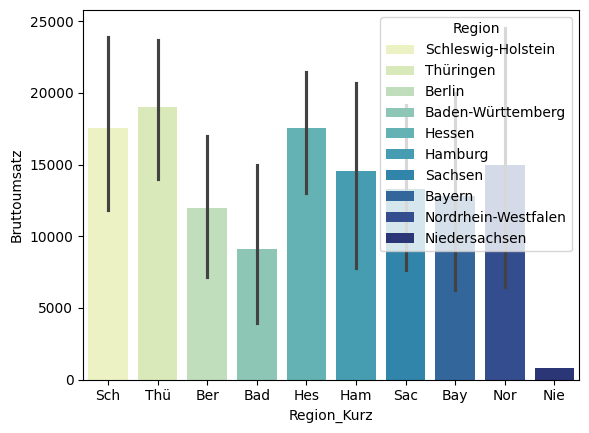

In [11]:
#Hier kann man gut erkennen das die Regionen Thüringen und Schleswig-Holstein gut sind und Niedersachsen und Baden-Württemberg weniger.
df['Region_Kurz'] = df['Region'].str[0:3]
sns.barplot(x='Region_Kurz', y='Bruttoumsatz', data=df, hue='Region', palette='YlGnBu')

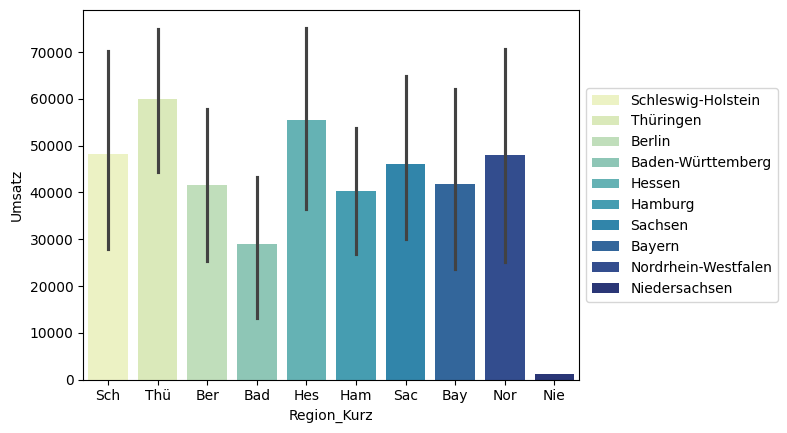

In [ ]:
df['Produkt_Kurz'] = df['Produkt'].str[0:1]
sns.barplot(x='Region_Kurz', y='Umsatz', data=df, hue='Region', palette='YlGnBu')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) #merke dir diesen ausdruck !

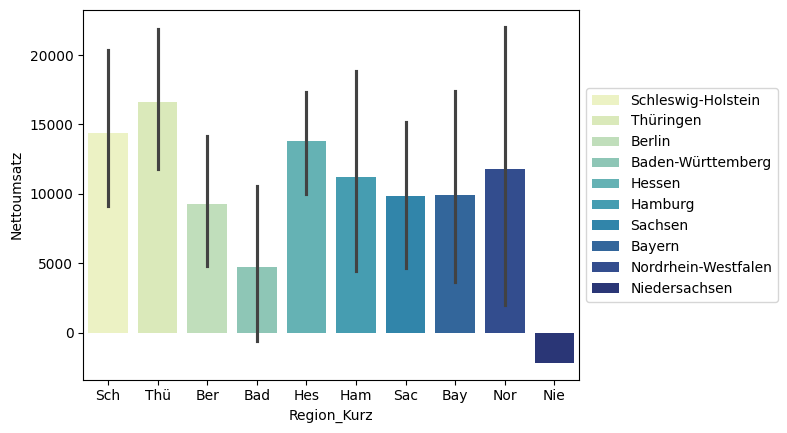

In [75]:
sns.barplot(x='Region_Kurz', y='Nettoumsatz', data=df, hue='Region', palette='YlGnBu')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

C:\Users\Claudio\AppData\Local\Temp\ipykernel_45352\3630175051.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


Text(0.5, 1.0, 'Claudio_Group_nach_Umsatz')

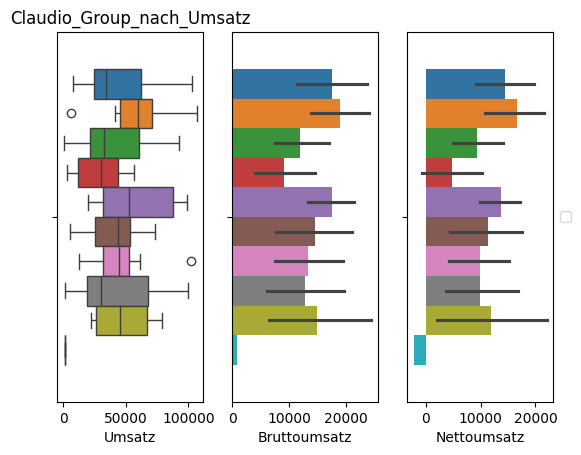

In [79]:
Claudios_Plot= plt.subplot(1,3,1)
sns.boxplot(x='Umsatz', hue='Region_Kurz', data=df,  legend=False) #legend=False)
plt.subplot(1,3,2)
sns.barplot(x='Bruttoumsatz', hue='Region_Kurz', data=df, legend=False)
plt.subplot(1,3,3)
sns.barplot(x='Nettoumsatz', hue='Region_Kurz', data=df, legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
Claudios_Plot.set_title("Claudio_Group_nach_Umsatz")

In [4]:
df['Status'] = df['Umsatz'].apply(lambda x: 'Sehr hoch' if x > 100000 else 'Normal')


In [5]:
df.loc[(df['Status']== "Sehr hoch")]

,Kundenname,Region,Produkt,Kaufpreis (EUR),Absatz,Verkaufpreis (EUR),Steuern (EUR),Mitarbeiterkosten (EUR),Laden,Bruttoumsatz,...,Region_Kurz,Neumann_AG,Meier_KG_Summe,Richter_GmbH_Summe,Wolf_AG,Beck_KG,Braun_KG,Schmidt_AG,Guter_Absatz,Status
17,Hahn GmbH,Thüringen,T-Shirt,1985,40,2684,509.96,1278,Store Frankfurt,27750.30,...,Thü,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Gut,Sehr hoch
29,Wolf AG,Sachsen,E-Bike,1936,39,2628,499.32,4934,Store Berlin,26794.24,...,Sac,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Gut,Sehr hoch
38,Neumann AG,Schleswig-Holstein,Smartphone,1908,38,2696,512.24,4027,Store Leipzig,30070.08,...,Sch,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Gut,Sehr hoch


In [8]:
df['Nettoumsatz_Gut'] = df['Nettoumsatz'].apply(lambda x: 'Sehr hoch' if x > 20000 else "Normal")

In [9]:
df.loc[(df['Nettoumsatz_Gut']== "Sehr hoch")]

,Kundenname,Region,Produkt,Kaufpreis (EUR),Absatz,Verkaufpreis (EUR),Steuern (EUR),Mitarbeiterkosten (EUR),Laden,Bruttoumsatz,...,Neumann_AG,Meier_KG_Summe,Richter_GmbH_Summe,Wolf_AG,Beck_KG,Braun_KG,Schmidt_AG,Guter_Absatz,Status,Nettoumsatz_Gut
1,Richter GmbH,Thüringen,E-Bike,1732,35,2637,501.03,580,Store Köln,31349.20,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Sehr hoch
2,Wolf AG,Berlin,Drucker,799,32,1738,330.22,785,Store Berlin,30010.44,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Sehr hoch
5,Wolf AG,Hamburg,Laptop,861,34,1700,323.00,2716,Store Hannover,28895.16,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Sehr hoch
10,Weber KG,Bayern,Fernseher,1481,30,2369,450.11,1502,Store Nürnberg,26302.56,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Sehr hoch
12,Meier KG,Bayern,Kopfhörer,1812,36,2754,523.26,3026,Store Leipzig,34138.08,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Gut,Normal,Sehr hoch
16,Fischer GmbH,Nordrhein-Westfalen,Fernseher,1576,32,2498,474.62,2313,Store Stuttgart,29061.44,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Sehr hoch
17,Hahn GmbH,Thüringen,T-Shirt,1985,40,2684,509.96,1278,Store Frankfurt,27750.30,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Gut,Sehr hoch,Sehr hoch
29,Wolf AG,Sachsen,E-Bike,1936,39,2628,499.32,4934,Store Berlin,26794.24,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Gut,Sehr hoch,Sehr hoch
38,Neumann AG,Schleswig-Holstein,Smartphone,1908,38,2696,512.24,4027,Store Leipzig,30070.08,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Gut,Sehr hoch,Sehr hoch
46,Krämer GmbH,Hamburg,Fernseher,1570,31,2334,443.46,3244,Store Dresden,23989.60,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Sehr hoch


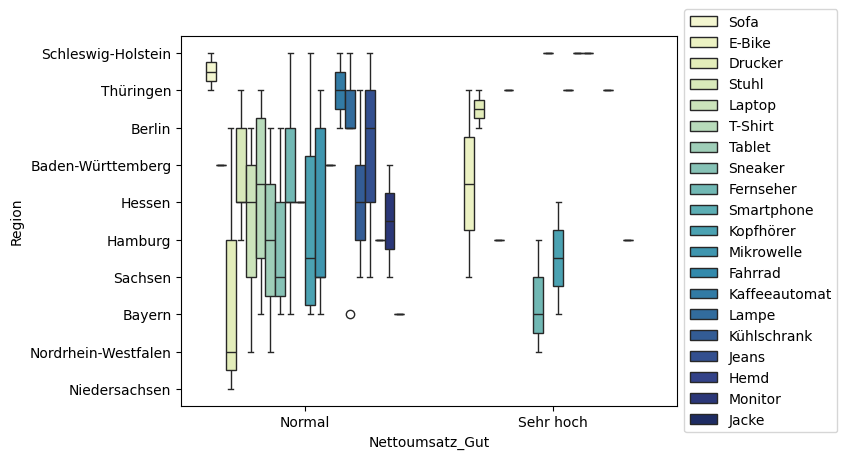

In [12]:
sns.boxplot(x='Nettoumsatz_Gut', y='Region', data=df, hue='Produkt', palette='YlGnBu')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#

In [13]:
df['Bruttomarge_Prozent'] = ((df['Bruttoumsatz'] / df['Umsatz'])*100)
df['Nettomarge_Prozent'] = ((df['Nettoumsatz'] / df['Umsatz'])*100)


In [14]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Kundenname               80 non-null     object 
 1   Region                   80 non-null     object 
 2   Produkt                  80 non-null     object 
 3   Kaufpreis (EUR)          80 non-null     int64  
 4   Absatz                   80 non-null     int64  
 5   Verkaufpreis (EUR)       80 non-null     int64  
 6   Steuern (EUR)            80 non-null     float64
 7   Mitarbeiterkosten (EUR)  80 non-null     int64  
 8   Laden                    80 non-null     object 
 9   Bruttoumsatz             80 non-null     float64
 10  Nettoumsatz              80 non-null     float64
 11  Umsatz                   80 non-null     float64
 12  Bruttomarge_Prozent      80 non-null     float64
 13  Nettomarge_Prozent       80 non-null     float64
 14  Region_Kurz              80 

In [15]:
df.loc[(df['Kundenname']== "Wolf AG")]

,Kundenname,Region,Produkt,Kaufpreis (EUR),Absatz,Verkaufpreis (EUR),Steuern (EUR),Mitarbeiterkosten (EUR),Laden,Bruttoumsatz,...,Neumann_AG,Meier_KG_Summe,Richter_GmbH_Summe,Wolf_AG,Beck_KG,Braun_KG,Schmidt_AG,Guter_Absatz,Status,Nettoumsatz_Gut
2,Wolf AG,Berlin,Drucker,799,32,1738,330.22,785,Store Berlin,30010.44,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Sehr hoch
5,Wolf AG,Hamburg,Laptop,861,34,1700,323.00,2716,Store Hannover,28895.16,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Sehr hoch
8,Wolf AG,Baden-Württemberg,E-Bike,404,16,597,113.43,4589,Store Berlin,3118.88,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Normal
14,Wolf AG,Bayern,Mikrowelle,545,22,770,146.30,711,Store Frankfurt,4905.00,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Normal
24,Wolf AG,Sachsen,Kühlschrank,701,28,1496,284.24,4136,Store Leipzig,22291.80,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Normal
29,Wolf AG,Sachsen,E-Bike,1936,39,2628,499.32,4934,Store Berlin,26794.24,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Gut,Sehr hoch,Sehr hoch
42,Wolf AG,Berlin,Sneaker,551,22,930,176.70,554,Store München,8353.16,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Normal
67,Wolf AG,Berlin,Drucker,85,3,217,41.23,764,Store Hannover,448.80,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Normal


In [16]:
df.loc[(df['Kundenname']== "Richter GmbH")]

,Kundenname,Region,Produkt,Kaufpreis (EUR),Absatz,Verkaufpreis (EUR),Steuern (EUR),Mitarbeiterkosten (EUR),Laden,Bruttoumsatz,...,Neumann_AG,Meier_KG_Summe,Richter_GmbH_Summe,Wolf_AG,Beck_KG,Braun_KG,Schmidt_AG,Guter_Absatz,Status,Nettoumsatz_Gut
1,Richter GmbH,Thüringen,E-Bike,1732,35,2637,501.03,580,Store Köln,31349.20,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Sehr hoch
25,Richter GmbH,Schleswig-Holstein,Fernseher,611,24,920,174.80,1102,Store Dresden,7551.96,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Normal
53,Richter GmbH,Berlin,Kopfhörer,1127,23,1203,228.57,2345,Store Köln,1713.04,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Normal
55,Richter GmbH,Hessen,Fernseher,398,16,1360,258.40,3979,Store München,15315.04,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Normal
70,Richter GmbH,Hessen,Kopfhörer,830,33,1580,300.20,2945,Store Frankfurt,24900.00,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Sehr hoch


In [17]:
df.loc[(df['Kundenname']== "Richter GmbH")] 

,Kundenname,Region,Produkt,Kaufpreis (EUR),Absatz,Verkaufpreis (EUR),Steuern (EUR),Mitarbeiterkosten (EUR),Laden,Bruttoumsatz,...,Neumann_AG,Meier_KG_Summe,Richter_GmbH_Summe,Wolf_AG,Beck_KG,Braun_KG,Schmidt_AG,Guter_Absatz,Status,Nettoumsatz_Gut
1,Richter GmbH,Thüringen,E-Bike,1732,35,2637,501.03,580,Store Köln,31349.20,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Sehr hoch
25,Richter GmbH,Schleswig-Holstein,Fernseher,611,24,920,174.80,1102,Store Dresden,7551.96,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Normal
53,Richter GmbH,Berlin,Kopfhörer,1127,23,1203,228.57,2345,Store Köln,1713.04,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Normal
55,Richter GmbH,Hessen,Fernseher,398,16,1360,258.40,3979,Store München,15315.04,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Normal
70,Richter GmbH,Hessen,Kopfhörer,830,33,1580,300.20,2945,Store Frankfurt,24900.00,...,319281.46,258416.08,215053.3,305467.0,276854.56,142066.92,310296.68,Schlecht,Normal,Sehr hoch


In [12]:
df['Region_Kurz']=df['Region'].str[0:3]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Kundenname               80 non-null     object 
 1   Region                   80 non-null     object 
 2   Produkt                  80 non-null     object 
 3   Kaufpreis (EUR)          80 non-null     int64  
 4   Absatz                   80 non-null     int64  
 5   Verkaufpreis (EUR)       80 non-null     int64  
 6   Steuern (EUR)            80 non-null     float64
 7   Mitarbeiterkosten (EUR)  80 non-null     int64  
 8   Laden                    80 non-null     object 
 9   Bruttoumsatz             80 non-null     float64
 10  Nettoumsatz              80 non-null     float64
 11  Umsatz                   80 non-null     float64
 12  Bruttomarge_Prozent      80 non-null     float64
 13  Nettomarge_Prozent       80 non-null     float64
 14  Region_Kurz              80 

Text(0.5, 1.0, 'Brutto/Nettomarge')

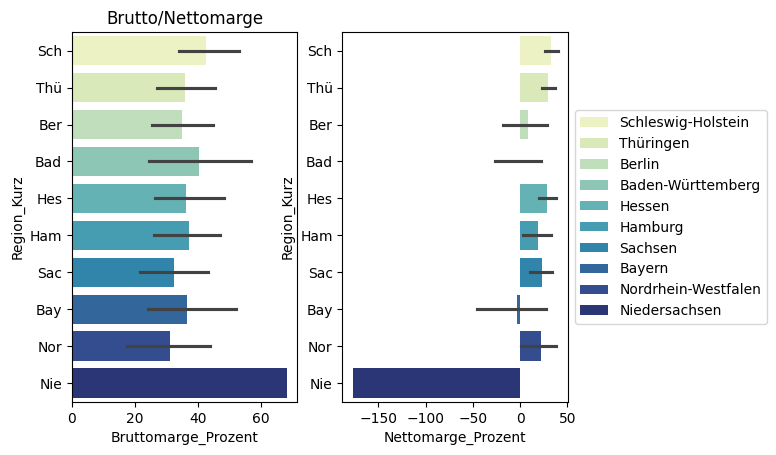

In [27]:
Claudios_Group_AG =plt.subplot(1,2,1)
sns.barplot(x='Bruttomarge_Prozent', y='Region_Kurz', hue='Region', data=df, palette='YlGnBu', legend=False)

plt.subplot(1,2,2)              
sns.barplot(x='Nettomarge_Prozent', y='Region_Kurz',hue='Region', data=df, palette='YlGnBu')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
Claudios_Group_AG.set_title("Brutto/Nettomarge")


In [ ]:
#Tag 43
#Auswertung meiner Daten
#Welche Gruppe kauft am meisten ein ? 
#Entweder wir listen alle Gruppe einzeln auf oder wir machen einen Sum für jede Gruppe, mal schauen ob ich es hinbekomme

0         Meier KG
1     Richter GmbH
2          Wolf AG
3          Beck KG
4       Neumann AG
          ...     
75        Braun KG
76      Schmidt AG
77        Meier KG
78      Lehmann AG
79      Schmidt AG
Name: Kundenname, Length: 80, dtype: object


In [ ]:
df.loc[(df['Kundenname']== "Meier KG")]


,Kundenname,Region,Produkt,Kaufpreis (EUR),Absatz,Verkaufpreis (EUR),Steuern (EUR),Mitarbeiterkosten (EUR),Laden,Bruttoumsatz,Nettoumsatz,Umsatz,Bruttomarge_Prozent,Nettomarge_Prozent,Region_Kurz
0,Meier KG,Schleswig-Holstein,Sofa,635,25,1221,231.99,4193,Store Dresden,14884.40,10459.41,31013.40,47.993448,33.725454,Sch
12,Meier KG,Bayern,Kopfhörer,1812,36,2754,523.26,3026,Store Leipzig,34138.08,30588.82,99804.96,34.204793,30.648597,Bay
36,Meier KG,Thüringen,Sofa,1164,23,2124,403.56,3676,Store Hamburg,22348.80,18269.24,49446.72,45.197740,36.947324,Thü
41,Meier KG,Schleswig-Holstein,Jeans,246,10,850,161.50,2633,Store Hamburg,5943.36,3148.86,8364.00,71.058824,37.647776,Sch
69,Meier KG,Thüringen,Kühlschrank,1723,34,1970,374.30,1161,Store Berlin,8511.62,6976.32,67886.20,12.538071,10.276492,Thü
77,Meier KG,Berlin,Stuhl,180,7,264,50.16,2959,Store Köln,604.80,-2404.36,1900.80,31.818182,-126.492003,Ber


In [42]:
Meier_KG_Summe = round(df.loc[df['Kundenname']== "Meier KG","Umsatz"].sum(), 2)
print(Meier_KG_Summe)

258416.08


In [43]:
Richter_GmbH_Summe = round(df.loc[df['Kundenname']== "Richter GmbH","Umsatz"].sum(), 2)

In [45]:
Wolf_AG=round(df.loc[df['Kundenname']== "Wolf AG","Umsatz"].sum(), 2)

In [ ]:
Beck_KG=round(df.loc[df['Kundenname']== "Beck KG", 'Umsatz'].sum(),2) 

In [67]:
Neumann_AG=round(df.loc[df['Kundenname']== "Neumann AG", 'Umsatz'].sum(),2)
Braun_KG=round(df.loc[df['Kundenname']== "Braun KG", 'Umsatz'].sum(),2)
Schmidt_AG=round(df.loc[df['Kundenname']== "Schmidt AG", 'Umsatz'].sum(),2)
print(Neumann_AG)
print(Braun_KG)
print(Schmidt_AG)

319281.46
142066.92
310296.68


In [68]:
df['Neumann_AG']=round(df.loc[df['Kundenname']== "Neumann AG", 'Umsatz'].sum(),2)
df['Meier_KG_Summe'] = round(df.loc[df['Kundenname']== "Meier KG","Umsatz"].sum(), 2)
df['Richter_GmbH_Summe'] = round(df.loc[df['Kundenname']== "Richter GmbH","Umsatz"].sum(), 2)
df['Wolf_AG']=round(df.loc[df['Kundenname']== "Wolf AG","Umsatz"].sum(), 2)
df['Beck_KG']=round(df.loc[df['Kundenname']== "Beck KG", 'Umsatz'].sum(),2)
df['Neumann_AG']=round(df.loc[df['Kundenname']== "Neumann AG", 'Umsatz'].sum(),2)
df['Braun_KG']=round(df.loc[df['Kundenname']== "Braun KG", 'Umsatz'].sum(),2)
df['Schmidt_AG']=round(df.loc[df['Kundenname']== "Schmidt AG", 'Umsatz'].sum(),2)


Text(0.5, 1.0, 'Umsatz nach Kunde, sortiert nach Region farblich')

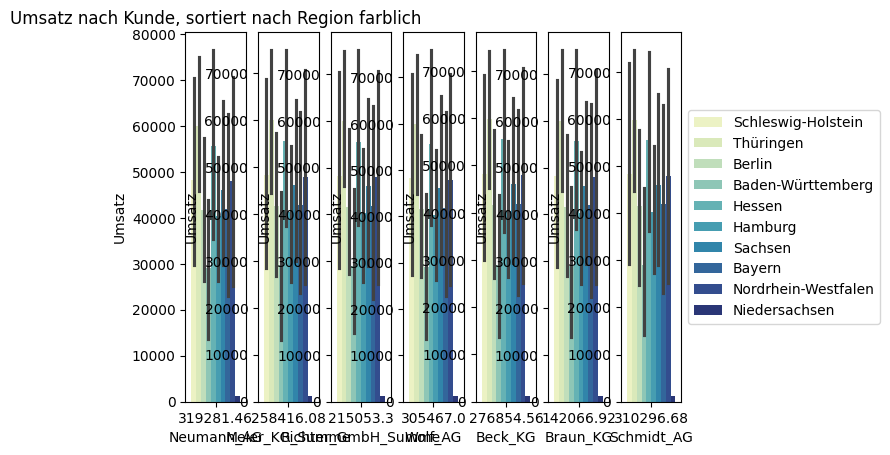

In [ ]:
#So jetzt habe ich diverse Umsatz daten nun machen wir eine Seaborn tabelle und hoffen es klappt.
Kundennamen = plt.subplot(1,7,1)
sns.barplot(x='Neumann_AG', y='Umsatz', data=df, hue='Region', palette='YlGnBu', legend=False)
plt.subplot(1,7,2)
sns.barplot(x='Meier_KG_Summe', y='Umsatz', data=df, hue='Region', palette='YlGnBu', legend=False)
plt.subplot(1,7,3)
sns.barplot(x='Richter_GmbH_Summe', y='Umsatz', data=df, hue='Region', palette='YlGnBu', legend=False)
plt.subplot(1,7,4)
sns.barplot(x='Wolf_AG', y='Umsatz', data=df, hue='Region', palette='YlGnBu', legend=False)
plt.subplot(1,7,5)
sns.barplot(x='Beck_KG', y='Umsatz', data=df, hue='Region', palette='YlGnBu', legend=False)
plt.subplot(1,7,6)
sns.barplot(x='Braun_KG', y='Umsatz', data=df, hue='Region', palette='YlGnBu', legend=False)
plt.subplot(1,7,7)
sns.barplot(x='Schmidt_AG', y='Umsatz', data=df, hue='Region', palette='YlGnBu')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
Kundennamen.set_title("Umsatz nach Kunde, sortiert nach Region farblich")
#klug wäre gewesen eventuell immer nur zwei oder drei zu nehmen und nicht alle ^^
#trotzdem sehen die daten biased aus xD aber immerhin, dies war ein haufen Arbeit =) 


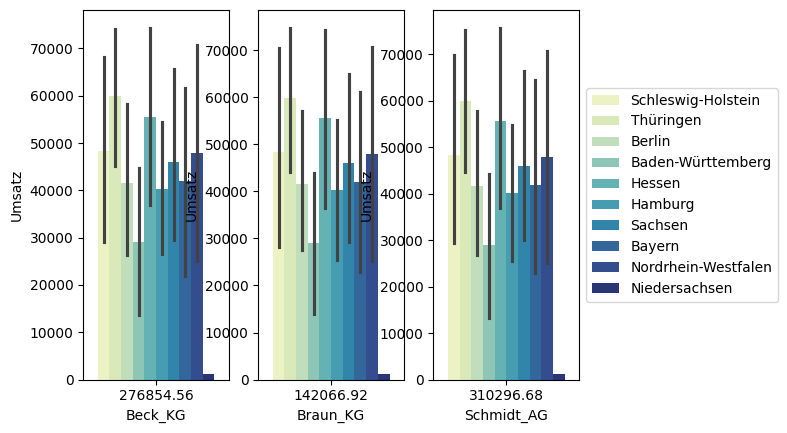

In [ ]:
plt.subplot(1,3,1)
sns.barplot(x='Beck_KG', y='Umsatz', data=df, hue='Region', palette='YlGnBu', legend=False)
plt.subplot(1,3,2)
sns.barplot(x='Braun_KG', y='Umsatz', data=df, hue='Region', palette='YlGnBu', legend=False)
plt.subplot(1,3,3)
sns.barplot(x='Schmidt_AG', y='Umsatz', data=df, hue='Region', palette='YlGnBu')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#sieht schon deutlich besser aus. 
#trotzdem sehen die daten biased aus 

In [18]:
#Somit wäre Aufgabe eins Souverän gelöst nun zu Aufgabe zwei. 
#Zwei Variabeln Visualisieren 

df['Guter_Absatz']=df['Absatz'].apply(lambda x: 'Gut' if x  > 35  else "Schlecht")
#jetzt hast du hier eine neue sortierte spalte und diese kannst du nun in einen barplot visualisieren

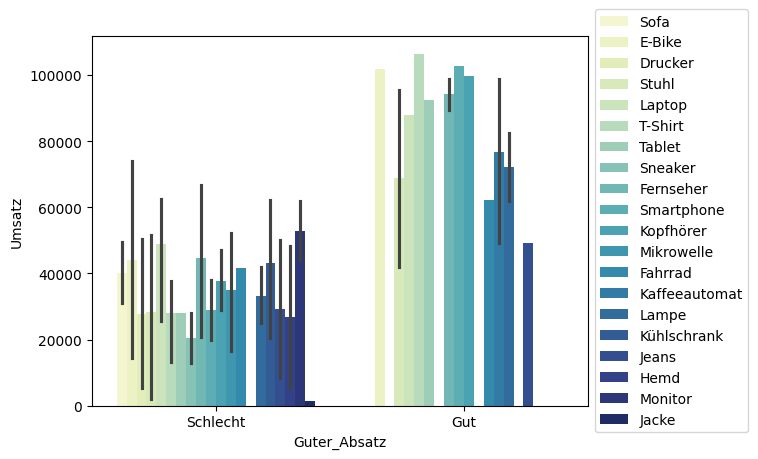

In [19]:
sns.barplot(x='Guter_Absatz', y='Umsatz', data=df, hue='Produkt', palette='YlGnBu')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [91]:
df['Umsatz'].mean()

np.float64(45661.70025)

In [92]:
df.to_csv('Claudios_Group_AG.csv', index=False)

In [ ]:
#Die Absatz Barplot finde ich sehr gut denn man kann gut erkennen welche Produkte welchen Umsatz erzielt haben
#Den Barplot mit den Kundennamen und Umsatz finde ich nicht so gut, da die Daten dort vermutlich nicht so gut sind und daher 
#kann man schlechter aus den Daten etwas gutes erkennen
#aber beide Ideen finde ich gut und ich konnte heute viel mitnehmen und lernen. 

In [ ]:
#Abschliessend kann man sagen, ich konnte diverse plots üben und daraus viel Lernen.
#Klar die Daten sind frei erfunden und daher sehen sie dementsprechend nicht so gut aus 
#und ergeben auch manchmal weniger Sinn, jedoch war mir dies nicht so wichtig. 
#Mit diesem Notebook, wollte ich meinen Lernfortschritt in Pandas aufzeigen 
#Dies ist die Finale Version, die älteren habe ich natürlich auch noch. 
#Ziel war es diverse Plots zu üben, meinen Lernfortschritt zeigen können und neue Gruppen erstellen. 
#Die Analyse war mir weniger wichtig, da dafür die Daten eher schlecht sind. Man kann natürlich, daraus auch 
#diverse schlüsse ziehen. 